# Introduction to Time Series Anaysis

### Data Science 350
### Stephen Elston

## Introduciton

This notebook provides an overview of time series analysis. Time series are an extremely common data type. Just a few of the many applications of time series analysis include:

- **Demand forecasting:** Electricity production, Internet bandwidth, Traffic management, Inventory management
- **Medicine:** Time dependent treatment effects, EKG, EEG
- **Engineering and Science:** Signal analysis, Analysis of physical processes
- **Capital markets and economics:** Seasonal unemployment, Price/return series, Risk analysis

This notebook covers the  following topics:

- Basic properties of time series.
- Decomposition of time series.
- Modeling of time series residuals and the ARIMA model.
- Forecasting with the R `forecast` package. 

As you work with time series keep in mind the wise words of the famous american baseball player and team manager, Yogi Berra; 

<center> **“It's tough to make predictions, especially about the future.”**!

***
**Note** To run this notebook, you must install the `forecast` package.  
***


## Short History of Time Series Analysis

The history of time series analysis starts with the pionering work of George Udny Yule (published 1927) and Gilber Walker (Published 1931). Both Yule and Walker worked on the auto regresive (AR) model for stochastic time series.

![](img/George_Udny_Yule.jpg)
<center> **George Yule; time series pioner**

Mathematical prodegee, Norbert Weiner invented filters for stochastic time series processes during the Second World war. Weiner worked at MIT and was assigned to a project to immrove the accuracy of anti-aircraft guns using the noisy radar signals of the day. He published his seminal paper on the subject in 1949. If you have recently used a mobile phone or streamed video or audio you are reciving benefits of wiener's research!

![](img/Norbert_wiener.jpg)
<center> **Norbert Weiner: Invented time series filter**

George Box and Gwilym Jenkins fully developed the the statistical theory  of time series by extending the work of Yule and Walker in the 1950s and d 1960s. This work was fully developed in thier seminal 1970  book. Their theory included the auto regressive moving averge (ARMA) model and the auto regressive integrfated moving averge (ARIMA) models we use in this notebook.

George Box was maired to Joan Fisher Box, an outstanding statistician in her own right and daughter of Ronald Fisher. 

![](img/GeorgeEPBox.jpg)
<center> **George Box fully developed the ARIMA model**

![](img/BoxJenkins.jpg)
<center> **Seminal book: by Box and  Jenkins**

## References

The book by Paul Cowpertwait and Andrew Metcalfe, *Introductory Time Series with R*,Springer, 2009,is good introduction to time series analysis. This book includes copious examples using R. 

![](img/Cowpertwait.jpg)

A more comprehensive treatment of time series theory can be found in a number of books. *Time Series Analysis With Applications in R* by Jonathan Cryer and Kung-Sik Chan, Springer, 2010, is both comprehensive and readable. However, the R code examples are sparse and poorly organized.

![](img/Cryer.jpg)

A comprehensive list of R time series packages can be found in the [CRAN Time Series Task View](https://cran.r-project.org/web/views/TimeSeries.html)

## Working with Time Series in R

R contains a number of time series classes. In this notebook we will work with the basic `ts` class. A powerful `zoo` class provides more capabilities. The `xts` package adds extensibility to the `zoo` class. Many other R time series classes are available. 

Let's create a simple R `ts` class time series object. Execute the code in the cell below to create a vector of values from a `sin` function. Note the class of the resulting vector. 

In [1]:
vec = sin((1:365)/30)  # A vector of values
class(vec) # Vector is an atomic class in R

[1] "numeric"

You have creted a numeric vector.

The code in the cell below does the following:

- The class of the vector is converted to `ts` with attributes of a start date and a frequecy.
- The class and attributes of the of the time series are printed.
- The time series is plotted using the `ts` plot method.

Execute this code and examine the results. 

$tsp
[1] 1990.000 1990.997  365.000

$class
[1] "ts"

Loading required package: repr


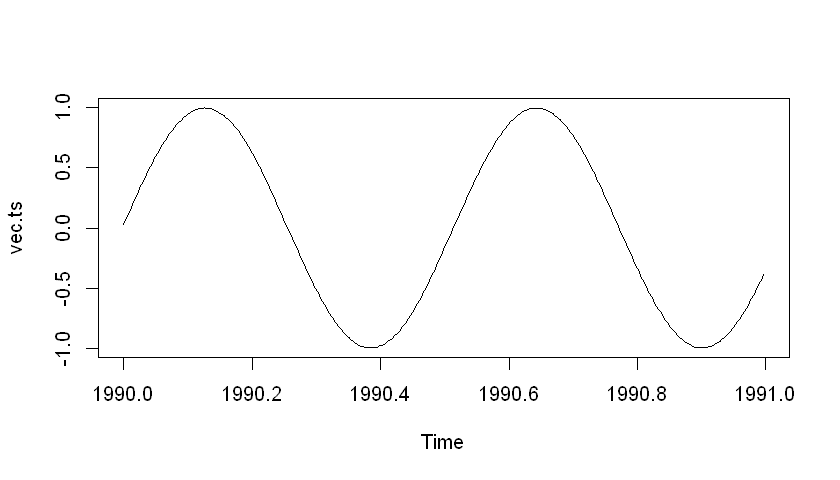

In [2]:
## Create a ts class object from the vector
## by adding time series attributes
vec.ts = ts(vec, start = 1990/01/01, freq = 365)
attributes(vec.ts) # Note the time series attributes
require(repr)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(vec.ts) # Note the x-axis is the time attribute

The vector is now of class `ts`. The attributes include the start time, end time and frequency. The plot shows the time series values on the vertical axis and the calendar date on the horizontal axis. 

In summary, a time series object is an ordinary vector, matrix of data frame with special attributes. 

## Basic Time Series Properties

In this section we will explore some basic properties time series. Underrstnding these properties will help in understanding the models we explore in subsequent sections.

### Properties of White Noise Series

A random series drawn from **independent identically distributed (iid)** noise drawen from a Normal distribution. Such a series is said to be a **white noise** series. Since the series is iid there is no correlation from one value to the next. We can write a **discrete** white noise time series as just:

$$X(t) = (w_1, w_2, w_3, \dots, w_n)\\
where\\
w_t = N(0, \theta)$$

Notice that the standard deviation and therefore the variance of the series, $\theta$, is constant in time. We say that a time series with a constant variance is **stationary**. The properties of a stationary time series do not vary with time. 

Further, the values of the time series are given at specific or discrete times, making this a discrete time series. In compuational time series analysis we nearly always work with discrete time series. Some time series are inherently discrete including, unemployment rate average over a month, the daily closing price of a stock. Even if the underlying time series is continious, we typically work with **values sampled at discrete points in time**. For example, temperature is a continious variable, but we will generally work with sampled variables, such as hourly measurements. 

The code in the cell below creates a time series from an iid Normal distribution with mean zero. Execute this code and note the attributes and the plot.

$tsp
[1] 1990.000 2004.917   12.000

$class
[1] "ts"

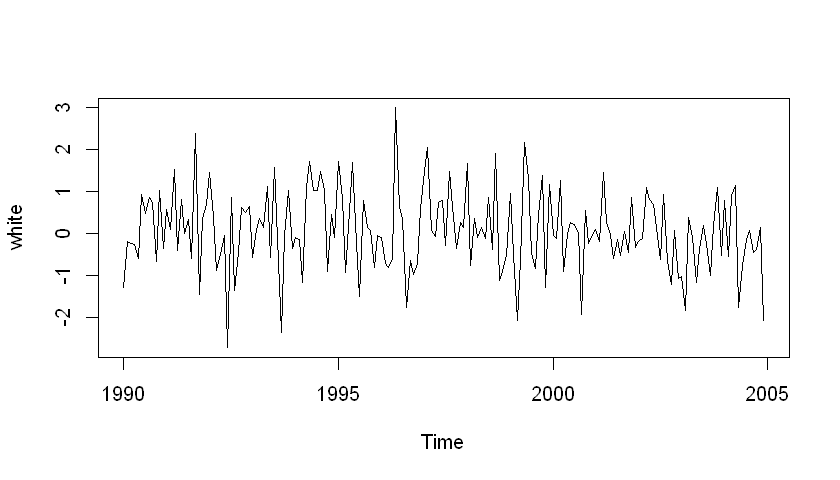

In [3]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
ts.white = function(n, mean = 0.0, sd = 1.0, start = 1990, freq = 12){
  ts(rnorm(n, mean = mean, sd = sd), start = start, freq = 12)
}
white = ts.white(180)
attributes(white)
plot(white)

Notice that the values of the time series move wander randomly around zero, with no particular trend. 

Next, let's look at the distribution of the time series values. The code in the cell below plots the histogram and Q-Q Normal plot of the values of the time series. Run this code and examine the results.  

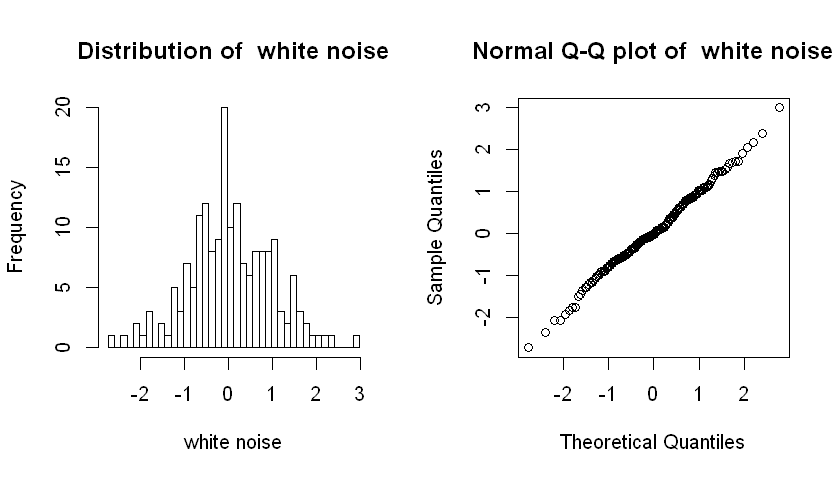

In [4]:
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}
dist.ts(white, col = 'white noise')

As expected, the values of the white noise series are normalilly distributed. When examining these plots keep in mind there are only 180 values. 

The values of the white noise series are iid, so we do not expect the values to show any dependency over time. In time series analysis we measure dependency using **autocorrelation**. Autocorrelation is the correlation of a series with itself lagged (off set) by some number of time steps. Autocorrelation at lag k can be writen as:

$$\rho_k = \frac{\gamma_k}{n \sigma^2} = \frac{1}{n \sigma^2} {\Sigma_{t = 1}^N (x_{t} - \mu) \cdot (x_{t-k} - \mu)}\\
where\\
k = lag\\
\gamma_k = covariance\ lag\ k\\
\mu = mean\ of\ the\ series\\
\sigma^2 = variance\ of\ the\ series = \frac{1}{n-1}\Sigma_{t = 1}^N (x_{t} - \mu) \cdot (x_{t} - \mu)$$

Notice that for any series, $\rho_0 = 1$. in other words, the autocorrleation of a series at lag zero equals one. 

We can also define a second order **partial autocorrelation**. The Partial autocoorelation at lag k is the correlation that results from removing the effect of any correlations due to the terms at smaller lags.

Let's plot the autocorrelation function (acf) and partial autocorrelation function (pacf) of the white noise series. Run the code in the cell below to compute and plot these functions. 

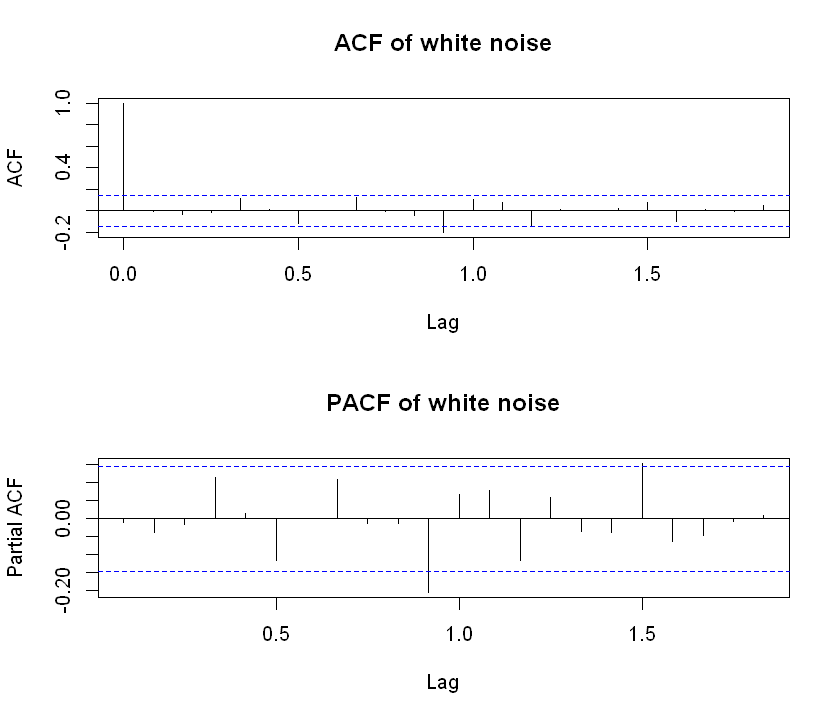

In [5]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}
      plot.acf(white, col = 'white noise', is.df = F)

As expected the white noise series only has a significant value at lag zero. There are no significant partial autocorrelation values. The dotted line is the 95% confidence interval. 

**Your Turn:** In the cell below create and execute the code to create a monthly series `(freq = 12)` of white noise plus a sinusodial component. Create a time series plot of the result. 

$tsp
[1] 1990.000 2004.917   12.000

$class
[1] "ts"

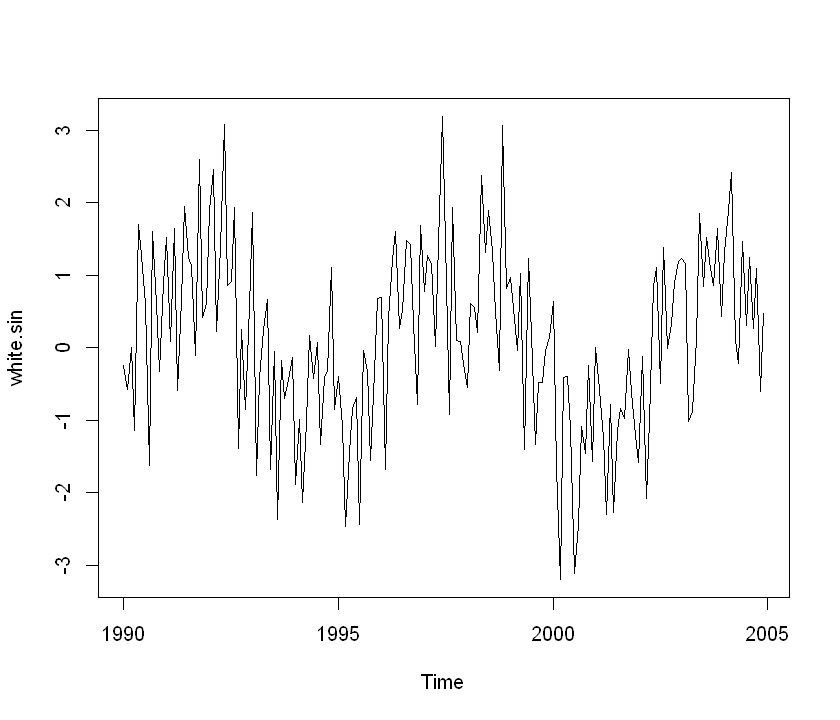

In [6]:
ts.white.sin = function(n, mean = 0.0, sd = 1.0, start = 1990, freq = 12){
  sin.vals = 1 * sin(1:n/freq)
  ts((rnorm(n, mean = mean, sd = sd) + sin.vals), start = start, freq = 12)
}
white.sin = ts.white.sin(180)
attributes(white.sin)
plot(white.sin)

### Random Walks

A **random walk** is the defined by the sum of a white noise series. In other words, the value of the random walk is the cumulative sum of the preceeding white noise series. 

$$y_t = y_{t-1} + w_t\\
Or\\
w_t = y_t - y_{t-1}$$ 

The quantities $y_t - y_{t-1}$ are known as the **innovations** of the random walk.

But note that the covariance of a random walk increases with time and is not bounded.

$$\gamma_k = Cov(x_t, x_{t+k}) = t \sigma^2 \rightarrow \infty\ as\ t \rightarrow \infty$$

The random walk is therefore **not stationary** . 

The code in the cell below computes a random walk series by taking the cumulative sum over Noramlly distributed inovations. Run this code and examine the results. 

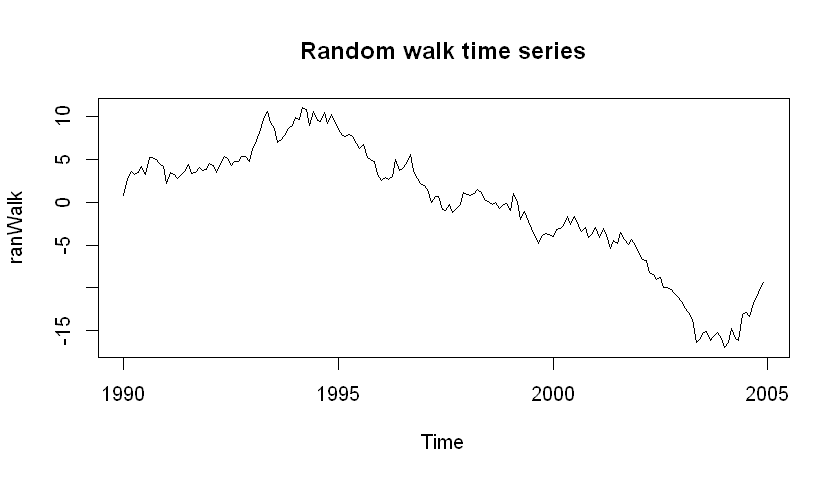

In [7]:
## Investigate the time series properties of random walk
options(repr.pmales.extlot.width=8, repr.plot.height=4)
ran.walk = function(n, freq = 12, start = 1990, sd = 1.0, mean = 0.0){
  norms = rnorm(n, mean = mean, sd = sd)
  ts(cumsum(norms), start = start, freq = 12)
}
ranWalk = ran.walk(180)
plot(ranWalk, main = 'Random walk time series')

The random walk wanders back and forth, but eventually heads in a particular direction. 

**Your Turn** What does the distribution of values of the random walk look like. What about the ACF and PACF of the random walk? In the cell below, create and execute the code to examine the probability distribution, ACF and PACF of the radom walk. Answer the following questions:

- How close to Normally distributed are the values of the random walk?
- How are the properties of the ACF and PACF different from those of the white noise series?

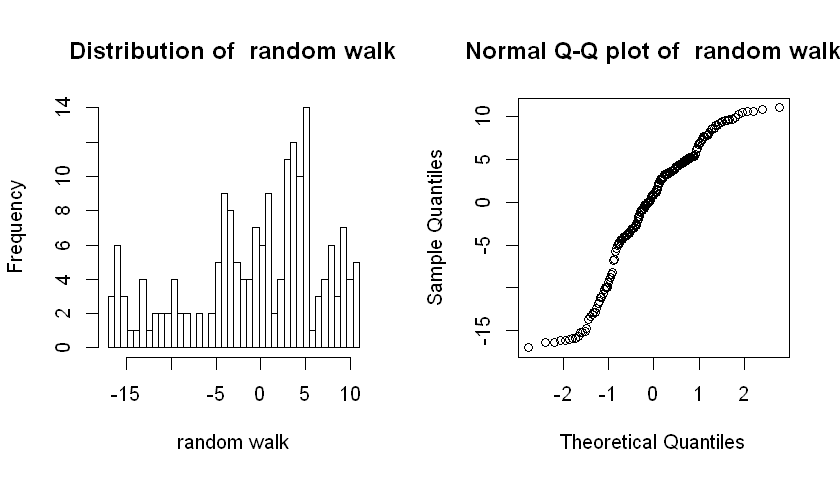

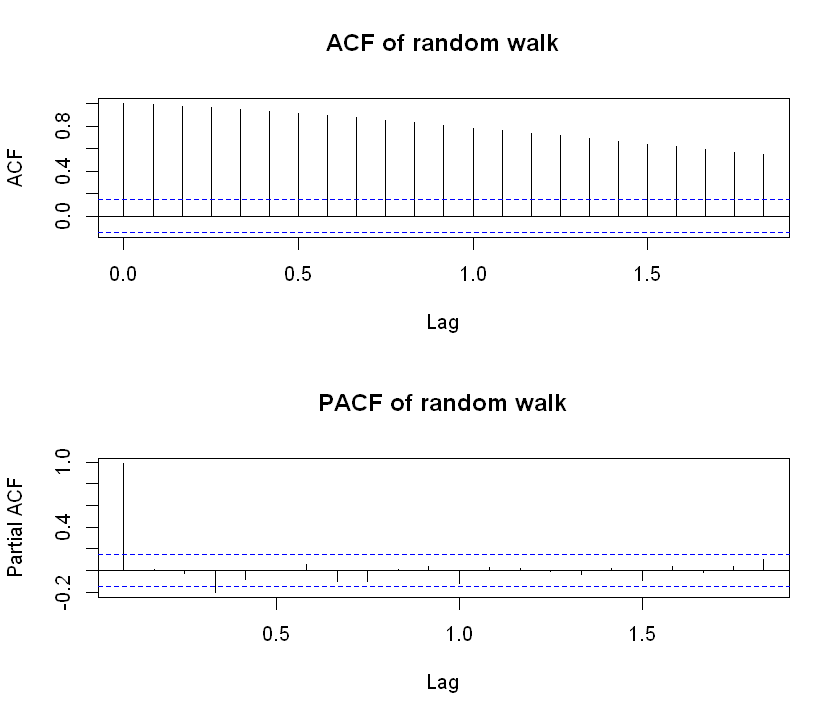

In [8]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(ranWalk, col = 'random walk')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(ranWalk, col = 'random walk', is.df = F)

### White Noise Series with Trend

What happens when we add a trend to the a white noise serie? Run the code in the cell below adds a linear trend to a white noise series. 

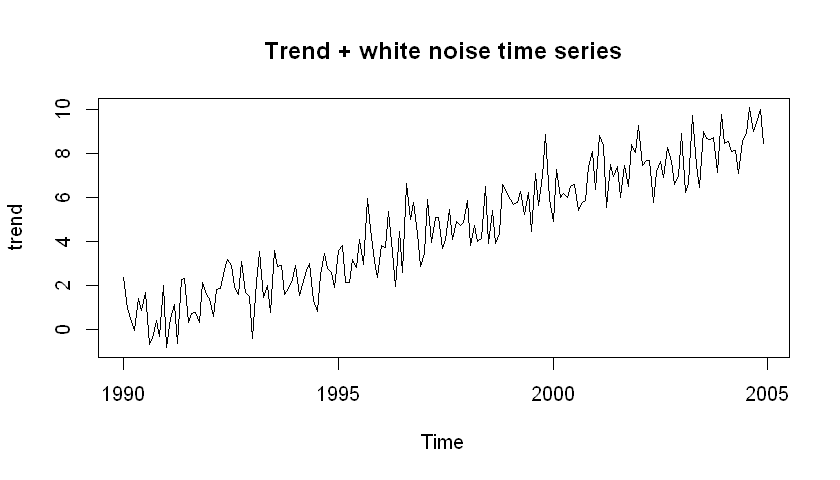

In [9]:
## ---- Investigate time series properties of 
## trend + white noise
options(repr.pmales.extlot.width=8, repr.plot.height=4)
ts.trend = function(n, slope = 0.01, mean = 0.0, sd = 1.0, start = 1990, freq = 12){
  temp = seq(0, slope * n, length.out = n) + 
          rnorm(n, mean = mean, sd = sd)
  ts(temp, start = start, freq = 12)
}
trend = ts.trend(180, slope = 0.05)
plot(trend, main = 'Trend + white noise time series')

As expected, the time series trends upward with a linear trend with iid Normal deviations. 

Run the code in the cell below to examine the distribution of values in this time series.

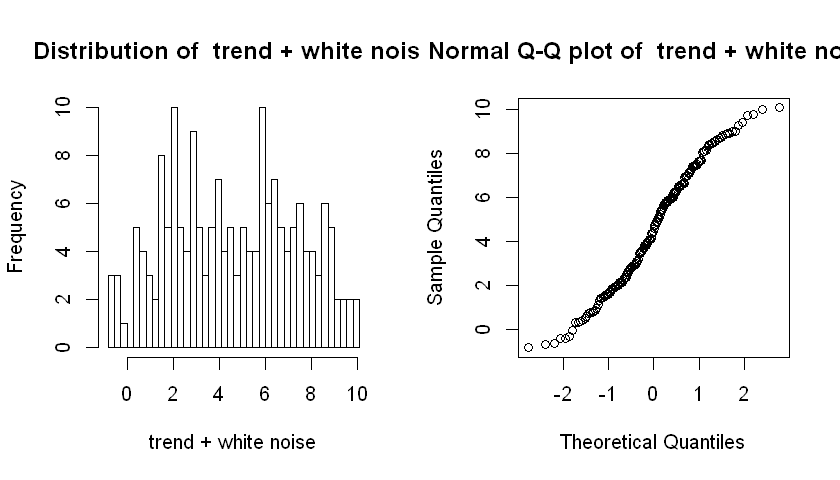

In [10]:
dist.ts(trend, col = 'trend + white noise')

The distribution is mostly Normal, but with heavy tails. 

How does adding a trend change the ACF and PACF? Run the code in the cell below and examine the results. 

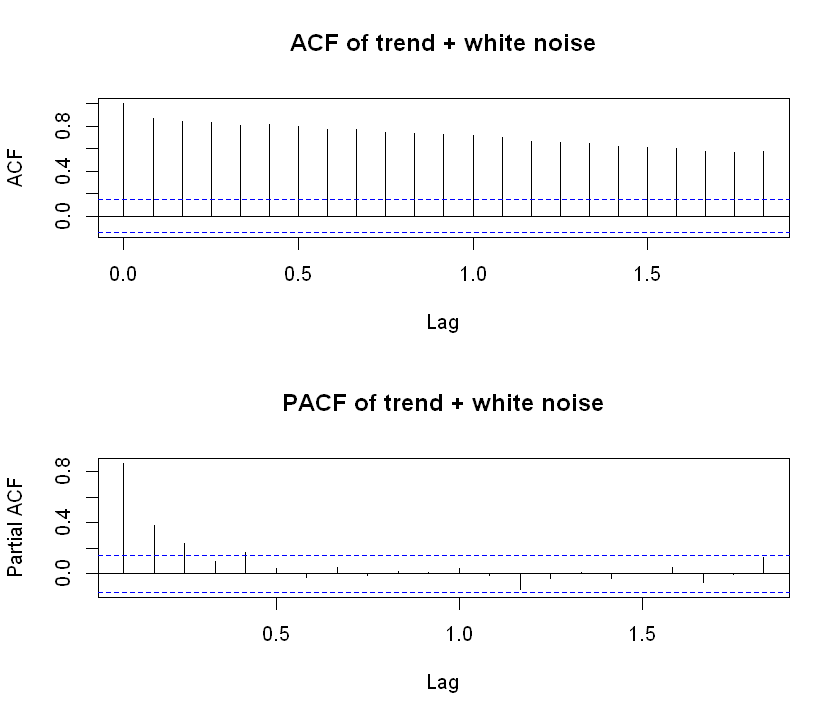

In [11]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(trend, col = 'trend + white noise', is.df = F)

Note the that the ACF decays slowly, as was the case with the random walk. In additon, the PACF shows significant values for at least one lag. This is the result of the trend creating dependency from one value to the next. Any time series with a trend is **not stationary**.

### Time Series with a Seasonal Component

Many real-world tine series include a seasonal component. A seasonal component is a period variation in the values of the time series. The periods can be measured in years, months, days, days of the week, hours of the day, etc. Some examples of seasonal components of time series inclde:

- Opion expiration dates in capital markets.
- Anual holidays which can affect transportation, utility use, shopping habits, etc.
- Weekend vs. business days, which account for volumns of certian transaction behavior.
- Month of the year which can affect emploiyment patterns, weather, etc.

Let's investigate the properties of a time series with a seasonal component. The coded in the cell below creates and plots a time series with sinusoidal seasonal component added to White noise. Run this coded and examine the results.

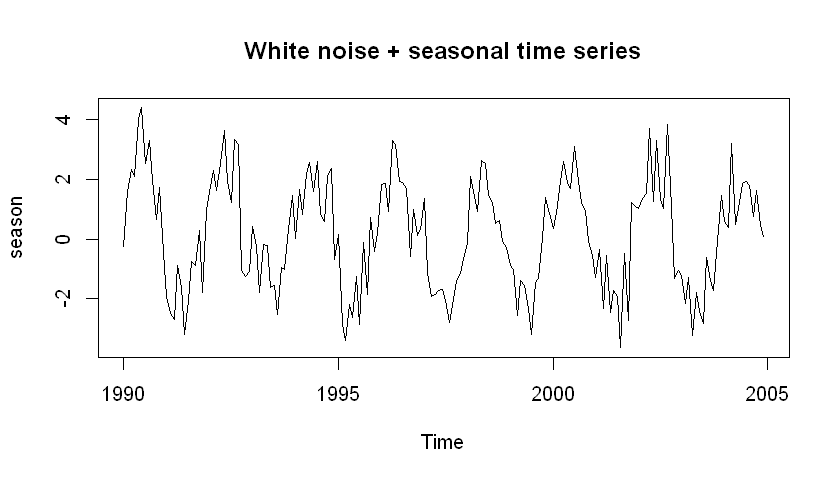

In [12]:
## --- Investigate time series properties of 
## trend + white noise + seasonal
ts.season = function(n, slope = 0.01, mean = 0.0, sd = 1.0, start = 1990, freq = 12){
   temp = seq(0, slope * n, length.out = n) + 
    rnorm(n, mean = mean, sd = sd) +
    2 * sin(0:(n -1) * pi / freq) +
     cos(0:(n -1) * pi / freq)
  ts(temp, start = start, freq = 12)
}
season = ts.season(180, slope = 0.00)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(season, main = 'White noise + seasonal time series')

As expected the time series looks like a noisy sin wave.

**Your Turn** What does the distribution of values of the seasonal time series look like. What about the ACF and PACF of the sesonal time series? In the cell below, create and execute the code to examine the probability distribution, ACF and PACF of this time series. Answer the following questions:

- How close to Normally distributed are the values of the seasonal time series?
- How are the properties of the ACF and PACF different from those of time series you have already examined?

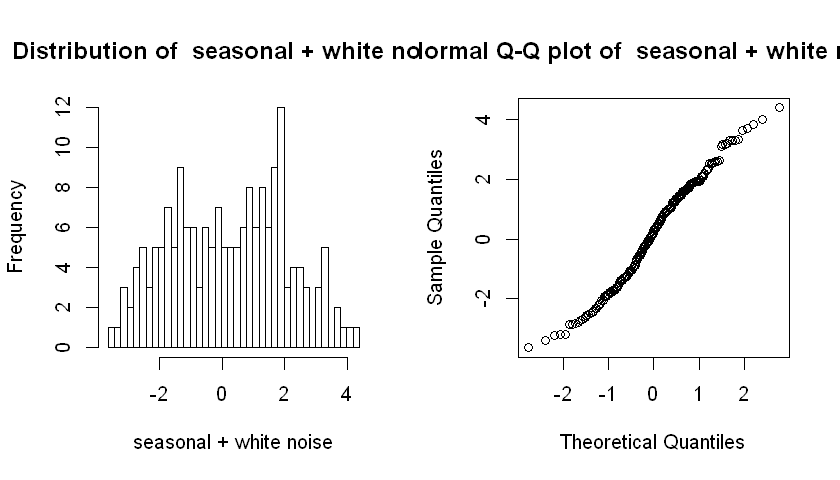

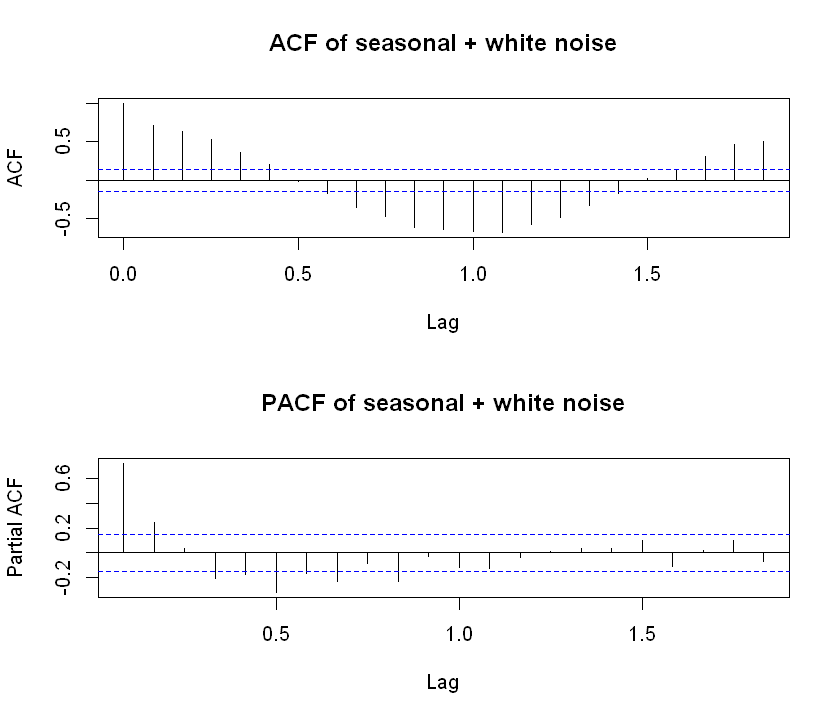

In [13]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(season, col = 'seasonal + white noise')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(season, col = 'seasonal + white noise', is.df = F)

## Decomposition of Time Series

We have looked at the properties of several types of time series. 

- White noise series.
- Random walks.
- White noise series with trend.
- White noise series with seasonal component.

Next, we have to look into methods for decomposing time series data into its **trend, seasonal and residual** components.

### The STL Decomposition Models

A direct decomposition model is know as the **seasonal, trend and residual** or **STL** model. Not too surprisingly this model does the following:

- The trend is removed using a LOESS regression model. 
- The seasonal component is removed using a regression on periodic components.
- The remainder is know as the residual. 

The decomposition can be either additive or multiplicative. The additive model simply sums the componets and is writen:

$$TS(t) = S(t) + T(t) + R(t)$$

The multiplicative model multiplies the three components. This model is particuarly useful in the common case where the seasonal effect increases in proportional to the trend. We can write this  model as follows:  

$$TS(t) = S(t)\ *\ T(t)\ *\ R(t)\\
or\\
log(TS(t)) = S(t) + T(t) + R(t)$$

You can find details of this model in [Rob Hyndman's lecture notes](http://robjhyndman.com/uwafiles/5-Cross-validation.pdf). 

Let's try this out on a time series which has a seasonal, trend and white noise residual component. Run the code below to compuute the model and plot the results.

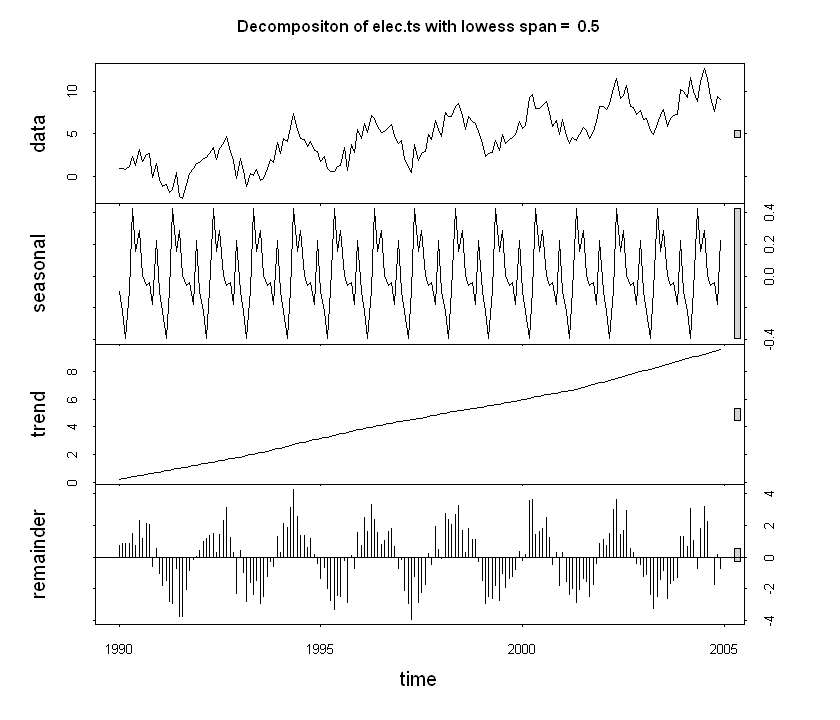

In [14]:
## Decomposition of the time series into components
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}
season.trend = ts.season(180, slope = 0.05)      
temp = ts.decomp(season.trend, is.df = FALSE, Mult = FALSE)

**Your Turn:** In the cell below create and exectue the code to plot the ACF and PACF of the residual compontent for the STL decomposition. Does it appear that the STL process has removed the trend and seasonal components of the time series fully or partially? **Hint**, the residual in the column three of the data frame retured by `ts.decomp`.

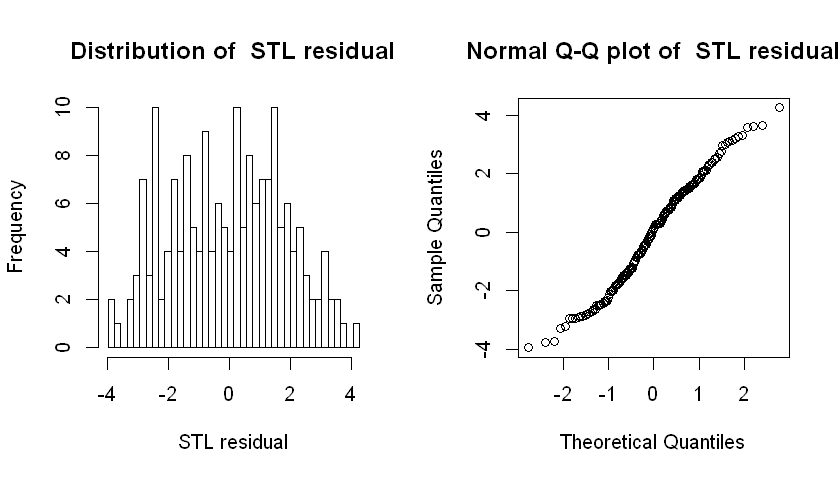

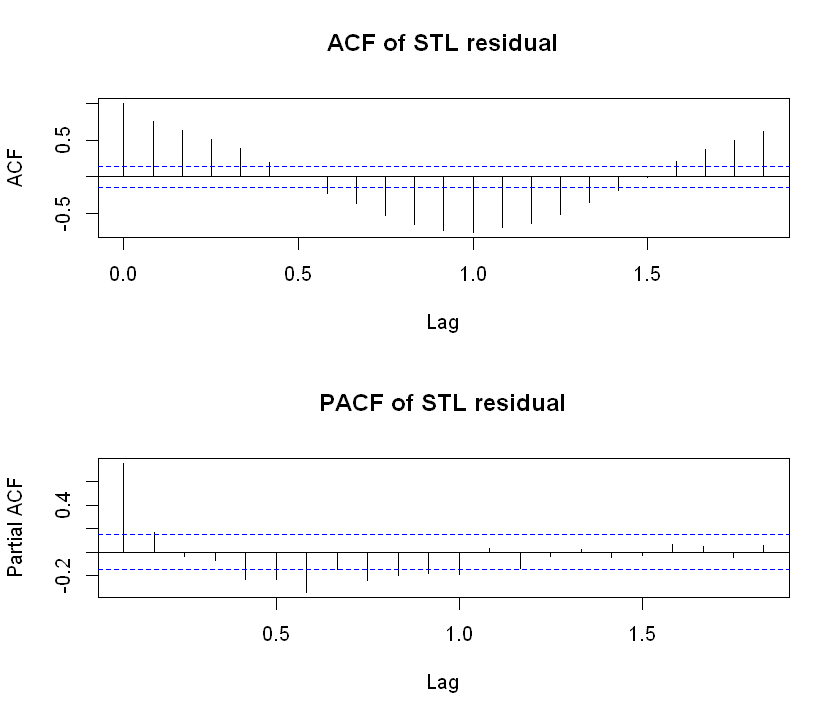

In [15]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(temp[,3], col = 'STL residual')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(temp[,3], col = 'STL residual', is.df = F)

### Difference Model for Random Walk

How do we deal with a random walk component? Reeall that the random walk is modeled as a cumulative sum (or integral in the continuious case) over the innovations. Further, random walk series are **not stationary**. By takeing the differences (or derivatives in the continuious case) we can recover the innovations as a stationary white noise residual series.

The code in the cell below using the `diff` function for time series to compute the difference in the random walk series. Execute this code and examine the result.  

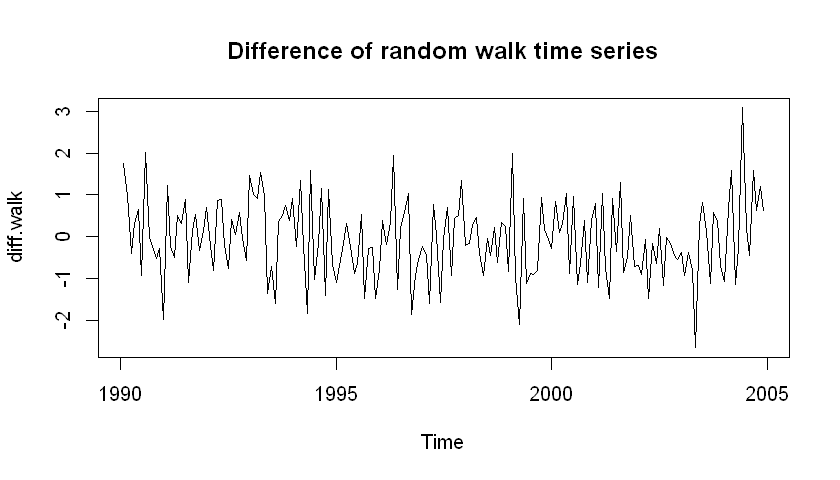

In [16]:
## Use a first order difference series to 
## remove the trend
ts.diff <- function(ts, lag = 1){
  diff(ts, lag = lag)
}
diff.walk = ts.diff(ranWalk)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(diff.walk, main = 'Difference of random walk time series')

The diference series resembles an iid white noise series. 

Run the code in the cell below to examine the distribution plots, the ACF and the PACF of the diference of the random walk series.

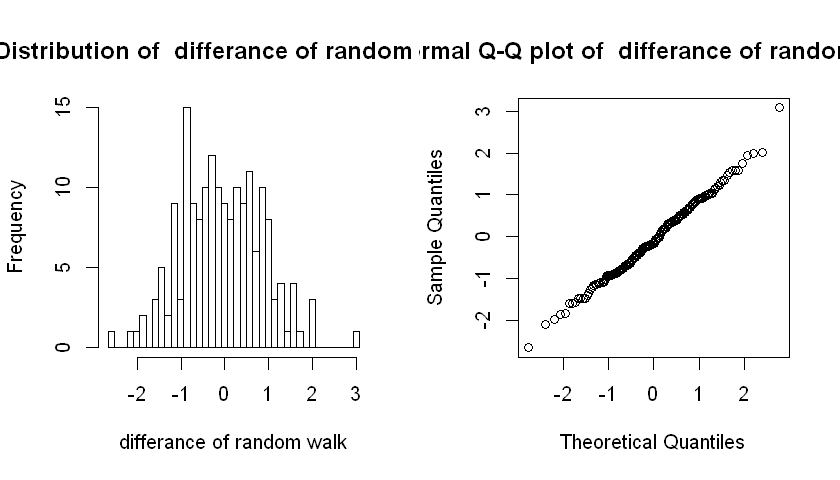

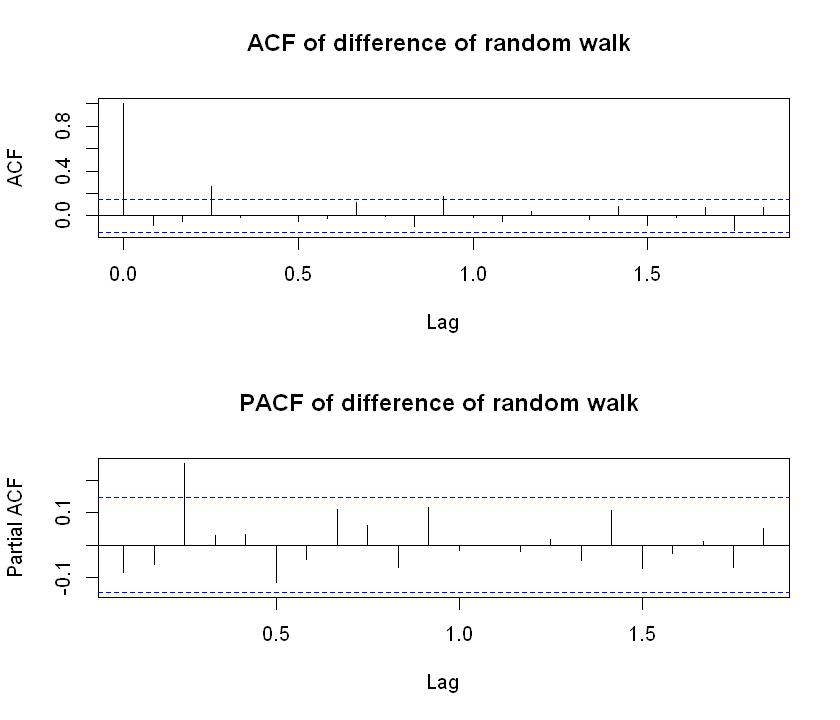

In [17]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(diff.walk, col = 'differance of random walk')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(diff.walk, col = 'difference of random walk ', is.df = F)

The distribution of the difference series values are close to Normal. The ACF and PACF plots verify that the difference series is a white noise series.  The differencing operator has transformed the non-stationary randowm walk series to a stationary white noise series. 

## ARIMA Models for the Residual Series

Now that we have investigated the basic properties of time series and some decomposition methods, let's investigate models for dealing with the residuals.

The class of models we will investigate are known and **autoregressive integrated moving average** or **ARIMA** model. We will work our way through each component of this model in the next few subsections. 

The ARIMA model and its relatives are **linear** in their coefficients. As you will see, the models are constrcted to to account for the serial correlations in time series data. At there code, these models are just special cases of linear regression. 

### Autoregressiive Model

The values of an **autoregrissive** or **AR** time series are determined by a linear combination of the past values.In other words, the AR model accounts for serial correlation in the values of the time series. We can write the value of an autoregressive series or **order p** or **AR(p)** series at time t as:

$$x_t = \alpha_1 x_{t-1} + \alpha_2 x_{t-2} \dots \alpha_p x_{t-p} + w_t$$

An AR process has the following properties:

- $\rho_0 = 1$ always.
- $p_k = \alpha^k$
- Number of nonzero PACF values = p.

AR models are specifically for **stationary time series**. If the variance is not constant or the trend component has not been removed, AR models will not produce statisfactory results.

Run the code in the cell below which simulates and plots an AR(1), or $x_t = 0.9\ x_{t-1}$, model.

$ar
[1] 0.9

$ma
[1] 0



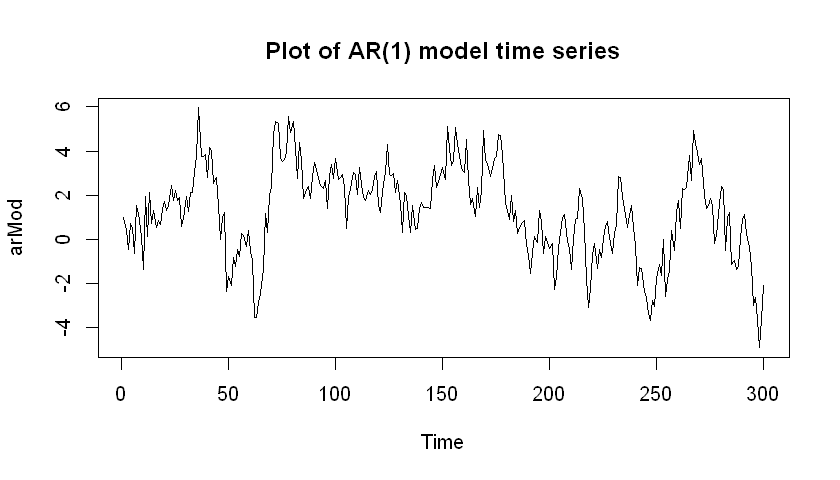

In [18]:
## ---- Simple ARMA models ------
## Simulate an ARMA process
arma.sim = function(ar = c(0.9), ma = c(0), n = 300, mean = 1.0){
  ar1.model = list(ar = ar, ma = ma)
  print(ar1.model)
  ar1 = mean + arima.sim(model = ar1.model, n = n)
  ar1
}
## --- AR(1) process
arMod = arma.sim()
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(arMod, main = 'Plot of AR(1) model time series')

The series shows significant deviatiions from the zero, and a bit drift from zero. 

Run the code in the cell below to plot the ACF and PACF of the AR(1) series. 

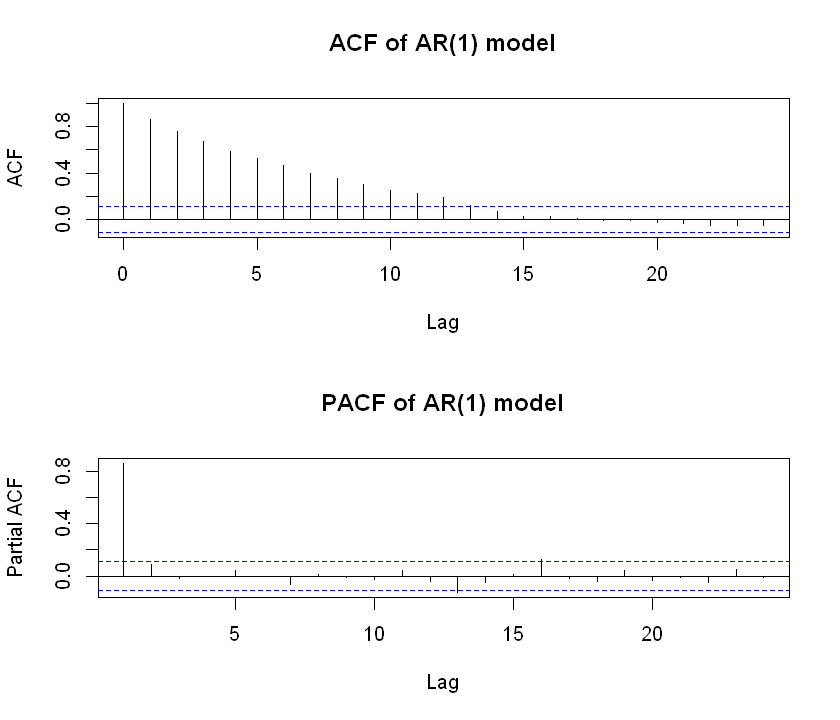

In [19]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(arMod, col = 'AR(1) model', is.df = F)

The AR(1) model produces a series with significant correlations in the lags, as shown in the  ACF plot. More importantly, the PACF has 1 significant lag value, consistent  with the AR(1) model. 

The AR time series model estimates the coeficients for the order of the model specified. The order of  the model is specified as `c(p,0,0)` in R vector. Run this code and examine  the  properties of the  results. 


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1
      0.9008
s.e.  0.0245

sigma^2 estimated as 1.062:  log likelihood = -435.49,  aic = 874.97


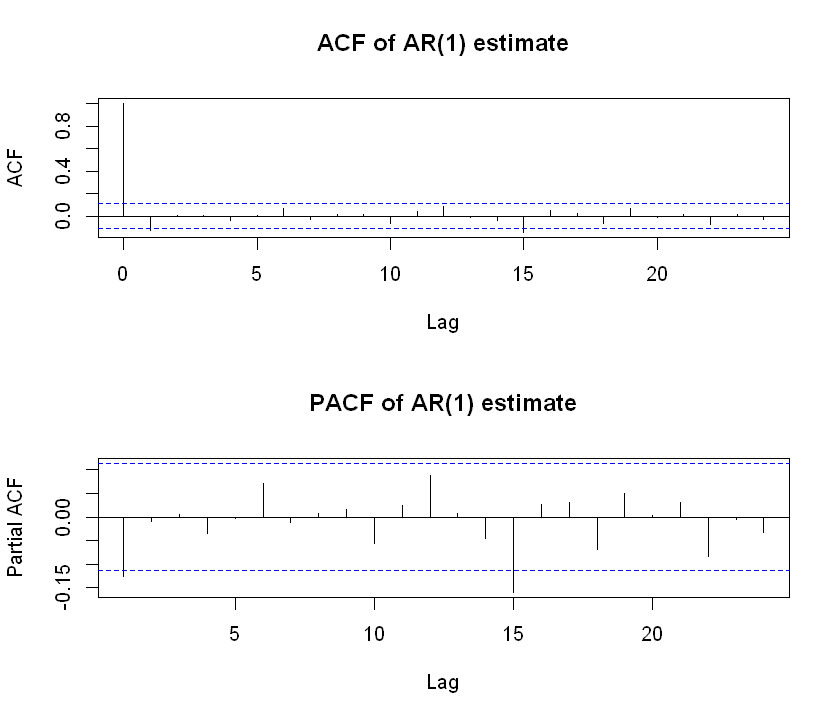

In [20]:
## Function for ARIMA model estimation
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}
mod.est = ts.model(arMod, col = 'AR(1) process', order = c(1,0,0))
plot.acf(mod.est$resid[-1], col = 'AR(1) estimate', is.df = F)

Note the following about the AR model:

- The estimated AR coefficient is nearly the same value as the orginal model. Further, the standard error is small relative to the value of the coefficient. 
- On the lag 0 value is  significant in the ACF  plot, indicating the estimate has removed the AR components from the original series. 
- The PACF remains insignificant, as is the case of the original series. 

### Moving Average Model

For a **moving average** or **MA** model the value of the time series at time `t` is determined by a linear combination of past white noise terms. In other words, the MA model accounts for series correlation in the noise terms. We can write the MA(q) model as the linear combination of the last `q` white noise terms $w_i$:

$$x_t = w_t + \beta_1 w_{t-1} + \beta_2 w_{t-2} + \cdots + \beta_q w_{t-q}$$

An MA process has the following properties:

- $\rho_0 = 1$ always.
- Number of nonzero $\rho_k; k \ne 0$ values = q.

MA models are specifically for **stationary time series**. If the variance is not constant or the trend component has not been removed, MA models will not produce statisfactory results.

The code in the cell below computes an `MA(1)` model with a coeficient $\beta_1 = 0.9$, and plots the results. Run this code and examine these plots.

$ar
[1] 0.001

$ma
[1] 0.9



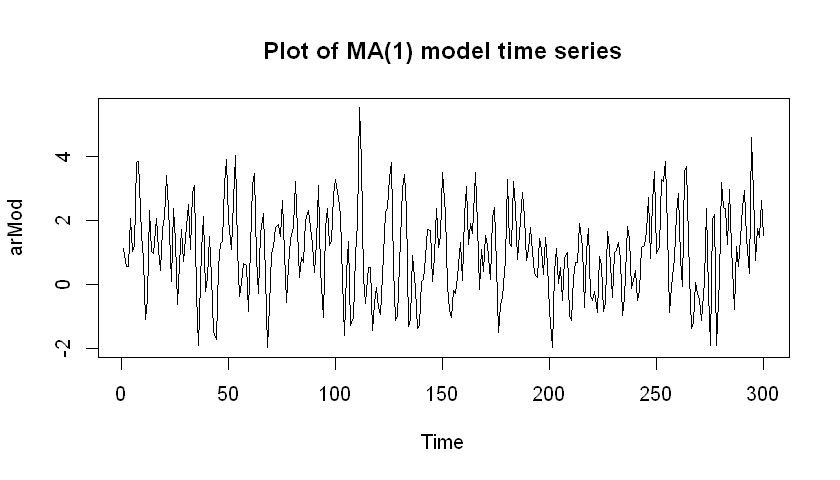

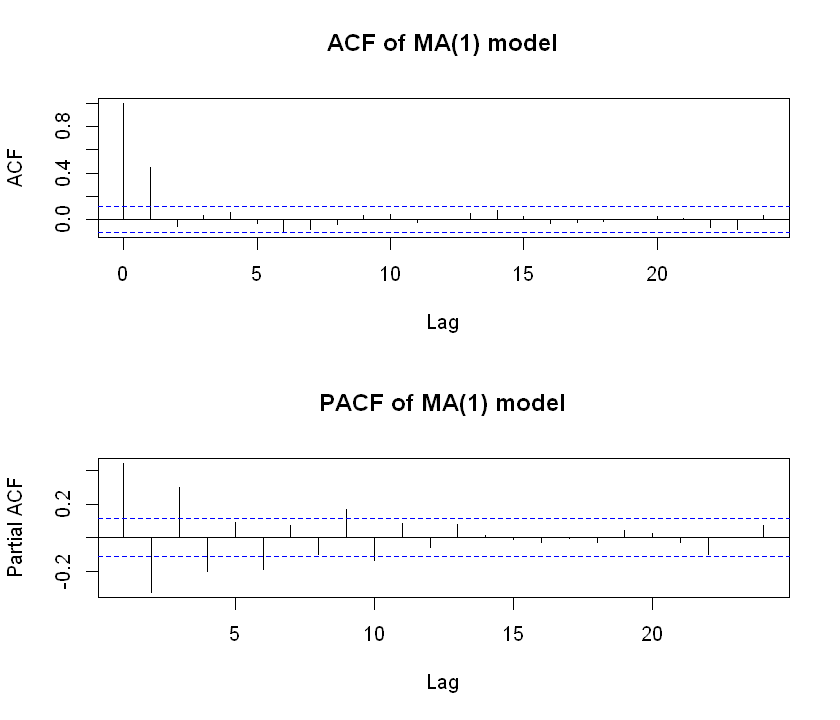

In [21]:
## --- MA(1) process
arMod = arma.sim(ar = c(0.001), ma = (0.9))
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(arMod, main = 'Plot of MA(1) model time series')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(arMod, col = 'MA(1) model', is.df = F)

As expected for an MA(1) process, the ACF has two significant values at lag 0 and 1. The PACF shows the results of the multiple serial correlations. 

Let's try to estimate the coefficients of the MA time series. The code in the cell below fits and MA(1) model to the time series. The model is specified as `c(0,0,q)` in R. Execute this code and examine the result. 


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.9260
s.e.  0.0204

sigma^2 estimated as 1.401:  log likelihood = -477.24,  aic = 958.48


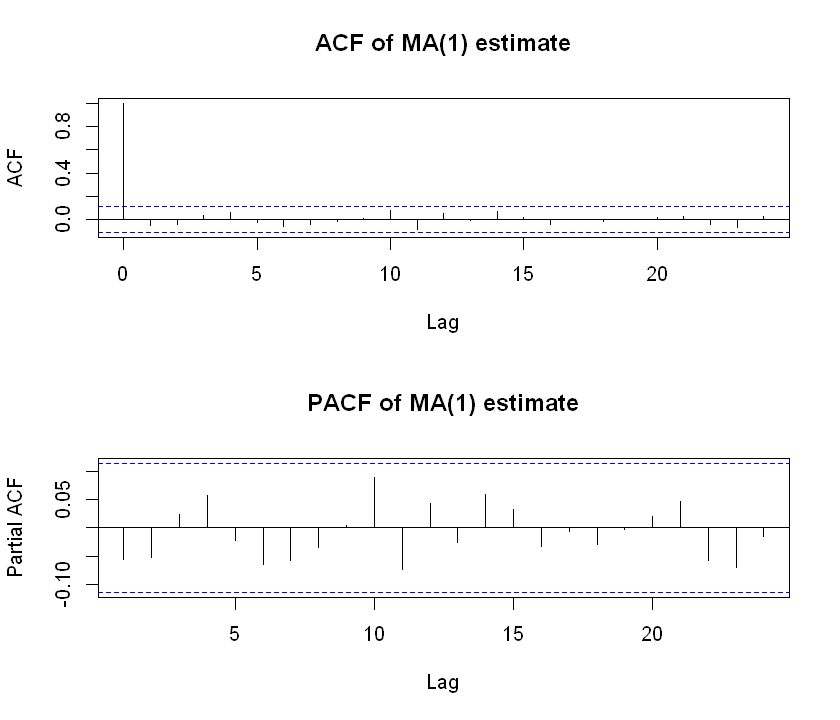

In [22]:
mod.est = ts.model(arMod, col = 'MA(1) process', order = c(0,0,1))
plot.acf(mod.est$resid[-1], col = 'MA(1) estimate', is.df = F)

Note the following about the MA model:

- The estimated MA coefficient is nearly the same value as the orginal model. Further, the standard error is small relative to the value of the coefficient. 
- The PACF values are all insignificant, indicating the estimate has removed the MA components from the original series. 
- Only the lag 0 value is significant in the ACF  plot.

### The Autoregressive Moving Average Model

We can combine the AR and MA models to create an **autoregressive moving averate** or **ARMA** model. This model accounts for serial correlation in both noise terms and values. We would expect we can write an ARMA model of order `(p,q)` as:

$$x_t = \alpha_1 x_{t-1} + \alpha_2 x_{t-2} \dots \alpha_p x_{t-p} +\\
w_t + \beta_1 w_{t-1} + \beta_2 w_{t-2} + \cdots + \beta_q w_{t-q}$$

The code in the cell below simulates and plots an `MA(1,1)` model. The model is specified in R by the vector `c(p,0,q)`. Execute this code and examine the results. 

$ar
[1] 0.9

$ma
[1] 0.9



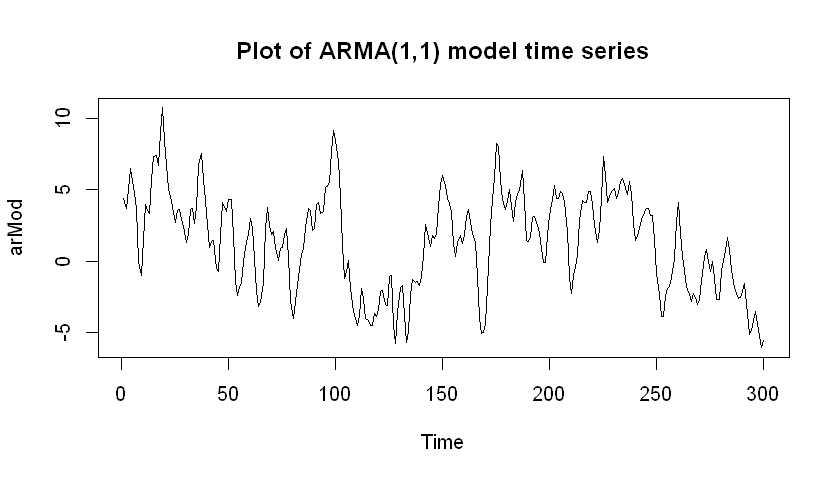

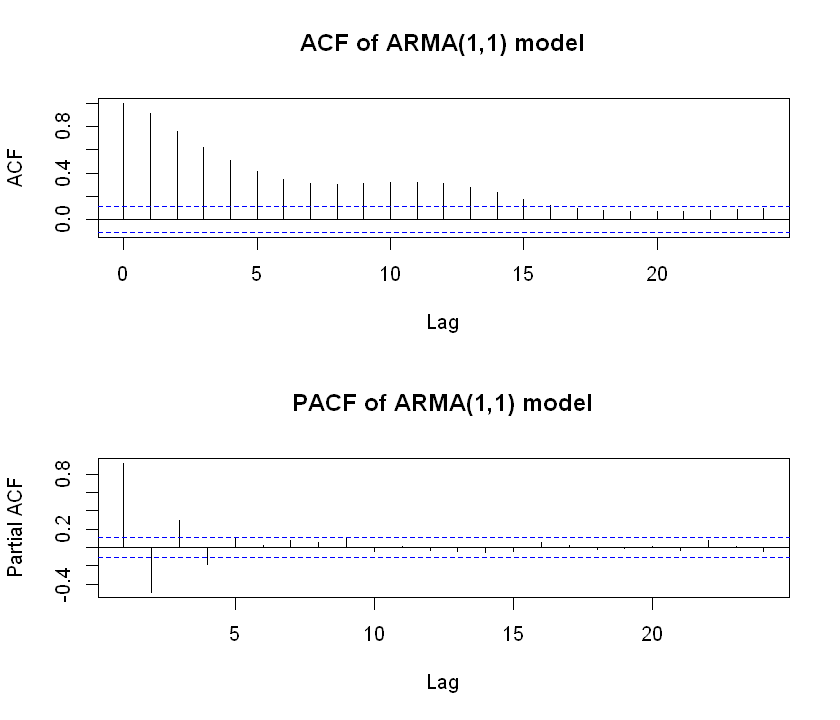

In [23]:
## ---- ARMA(1,1) process
arMod = arma.sim(ar = c(0.9), ma = (0.9))
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(arMod, main = 'Plot of ARMA(1,1) model time series')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(arMod, col = 'ARMA(1,1) model', is.df = F)

As expected, the ARMA(1,1) series has properties of both an AR(1) and MA(1) series. 

**Your Turn:** Try estimating the parameters of the time series, printing a summary of the model and plot the ACF and PACF of the residual. **Hint**, the ARMA(1,1) model is specified in R as `c(p,0,q)` or `c(1,0,1)`.  Run your code, examine the results and answer these questions to deterimine if your model is a good one: 

- How do the estimated MA and AR coefficients compare to the orginal model?
- How do the standard errors of the coefficients compare to the magnitudes of the coefficients? 
- Are all PACF values insignificant, indicating the estimate has removed the MA components from the original series?
- Is the lag 0 value the only significant value of the ACF, indicating the model has removed the AR component?


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ma1
      0.8811  0.8857
s.e.  0.0274  0.0226

sigma^2 estimated as 0.9233:  log likelihood = -415.8,  aic = 837.6


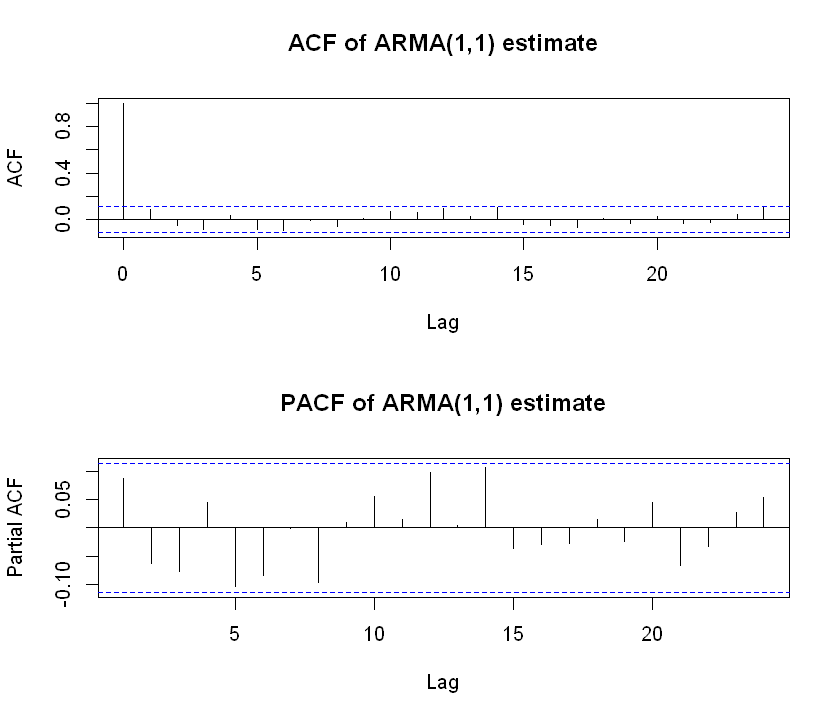

In [24]:
mod.arma = ts.model(arMod, col = 'ARMA(1,1) process', order = c(1,0,1))
plot.acf(mod.arma$resid[-1], col = 'ARMA(1,1) estimate', is.df = F)

### Autoregressive Integrated Moving Average Model

The **autoregreessive integrated moving average**, or **ARIMA** model adds an integrating term to the ARMA model. The integrating component performs differencing to model a random walk component. The integrating component models one of the **non-stationary** parts of a time series. The ARIMA model is defined by orders p, d, q. We have already looked at AR(p) and MA(q) models. The order of the differencing operator of the integrating term is defined by `d`. Since the integrating term is a differencing operator, there is no coeficient to estimate. 

In a pervious section we have already simulated a randomw walk series, and investigated its properties. The code in the cell below estimates the parameters for and plots the results of an ARIMA(0,1,0) model. Execute this code and examine the results. 


Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 0.854:  log likelihood = -239.87,  aic = 481.73
Sigma squared of the original series =  53.8114871074469

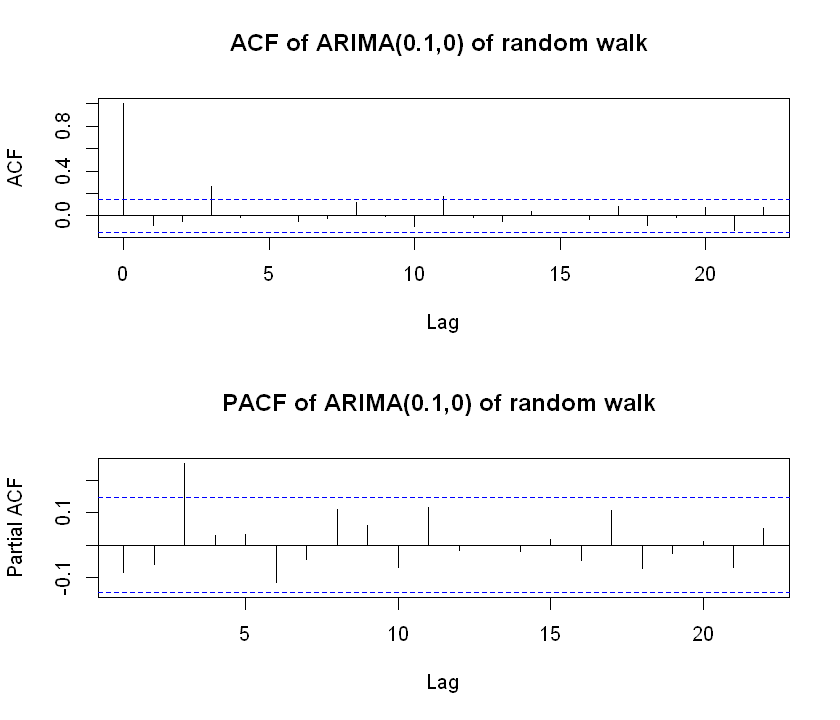

In [25]:
## ARMA model of the random walk difference process 
arima.est = ts.model(ranWalk, col = 'ARIMA process model', order = c(0,1,0))
cat(paste('Sigma squared of the original series = ', as.character(var(ranWalk))))
plot.acf(arima.est$resid[-1], col = 'ARIMA(0.1,0) of random walk ', is.df = F)

The results show that the first order differrence operator has removed the random walk component of the time series. Specifically: 

- The $\sigma^2$ or variance of the residual series is an order of magnitude less than the original series. 
- The PACF values are all insignificant, as expected from a white noise residual. 
- Only the lag 0 value is significant in the ACF, as expected from a white noise residual. 

## Real Data Example

Let's apply the models we have been working with on some real-world data. We will work with a data set which shows the consumpton of chocolate, beer and electricity in Australia from 1958 to 1991. 

### Load and Examine the Data

As a first step, run the code in the cell below to load the data from the `.csv` file and examine the head of the data frame. 

In [26]:
### ------- Real world data sets ------------
#
# --------Electricity, beer, and chocolate ----
#
# Load the data from the Internet
#www = "http://www.maths.adelaide.edu.au/emac2009/#Data/cbe.dat"
getwd()
CBE = read.table('cbe.dat', sep ="", header = TRUE)
head(CBE)

[1] "C:/Users/StevePC2/Documents/Git/DataScience350/Lecture8"

choc,beer,elec
1451,96.3,1497
2037,84.4,1463
2477,91.2,1648
2785,81.9,1595
2994,80.5,1777
2681,70.4,1824


As a next step we plot the three time series and their log transformed values. Execute the code in the cell below to create these plots. 

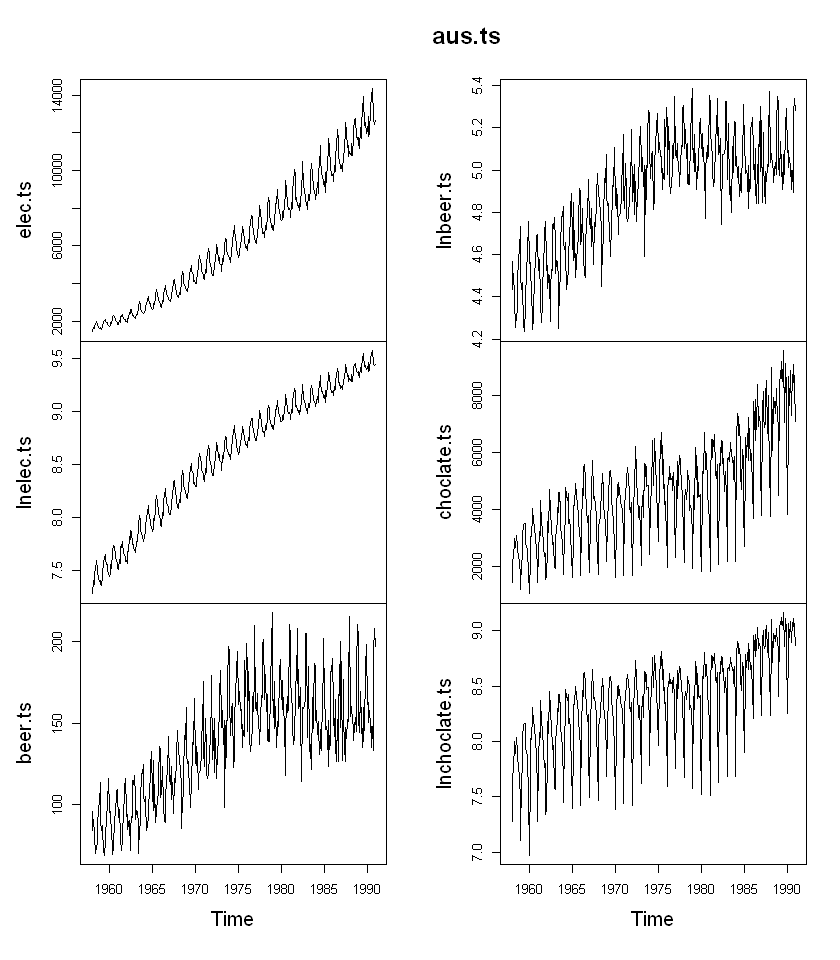

In [27]:
elec.ts = ts(CBE[,3], start = 1958, freq = 12)
lnelec.ts = log(ts(CBE[,3], start = 1958, freq = 12))
beer.ts = ts(CBE[,2], start = 1958, freq = 12)
lnbeer.ts = ts(log(CBE[,2]), start = 1958, freq = 12)
choclate.ts = ts(CBE[,1], start = 1958, freq = 12)
lnchoclate.ts = log(ts(CBE[,1], start = 1958, freq = 12))
aus.ts = cbind(elec.ts, lnelec.ts, beer.ts, lnbeer.ts, choclate.ts, lnchoclate.ts)
## First look at the series
options(repr.pmales.extlot.width=8, repr.plot.height=8)
plot(aus.ts)

Notive the follwing properties of these time series. 

- Each of these time series has a significant trend.
- Each of these time series have a noticable seasonal component.
- The magnitude of the seasonal component increases with trend in the un-transformed time series. 
- The seasonal component of the log transformeed series has a nearly constant magnitude. 

These results indicate that an sTL decomposition is required. Further, a multiplicative (log transformed) STL model is preferred. 

### STL Decomposition of Electric Time Series

Lets do some analysis of the electric time series. In this case, we will use a **multiplicative model** since the magnitude of the seasonal component generally increases with incresing trend. 

Execute the code in the cell below to compute the STL decomposition of the time series and examine the  results.

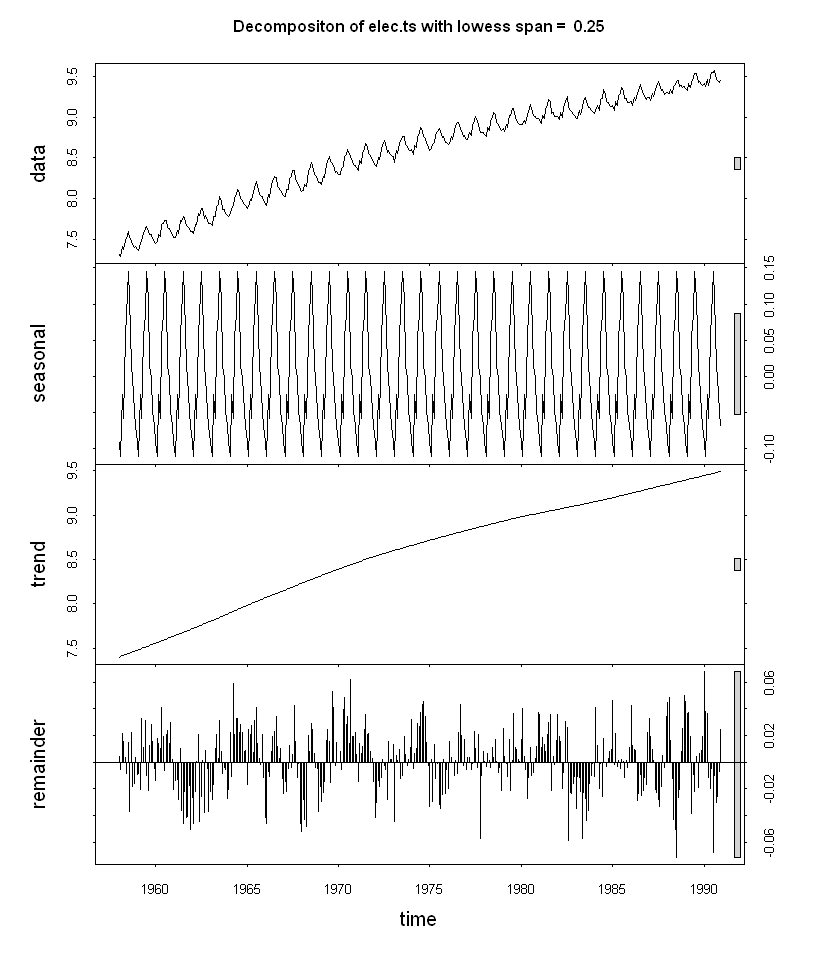

In [28]:
elect.decomp = ts.decomp(lnelec.ts, Mult = TRUE, is.df = FALSE, span = 0.25)

Note the following about these results:

- The periodic component looks reasonable, but may not be doing a complete job as evidenced by the remainder.
- The removal of the trend component appears to be satisfactory.

As a next step, compute and plot the ACF and PACF for the remainder series.

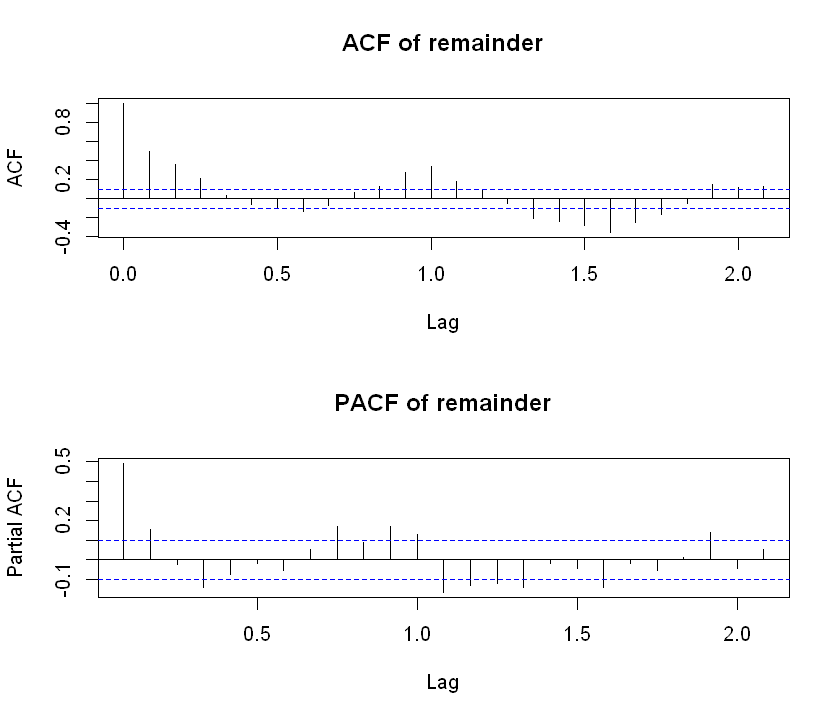

In [29]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(elect.decomp[, 3], is.df = FALSE)

The ACF and PACF exhibit both AR and MA behavior. However, there are signs of periodicity which the STL decomposition has not removed. 

### Apply ARIMA Model

Now that we have an STL decomposition of the electric use time series, we can compute an ARIMA model for the residual. As a starting point we will use an ARIMA(2,1,2) model. Run the code in the cell below and examine the results.

In [30]:
## Compute ARIMA model of electric residual
beer.arima = ts.model(elect.decomp[, 3], col = 'ARIMA model for electricity', order = c(2,1,2))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ar2      ma1      ma2
      0.3637  0.1841  -0.9437  -0.0563
s.e.  0.1973  0.1057   0.1969   0.1968

sigma^2 estimated as 0.0004142:  log likelihood = 975.55,  aic = -1941.1


The standard error of these coefficients are of similar magnitude or larger than the coefficients themselves in 3 of 4 cases. This behavior indicates that the model is over fit or over parameterized.

**Your Turn:** The order of the ARIMA model must be reduced. In the cell below test some lower order models to find a better fit to the residual of the electricity use time series. Examine the model performance, paying particular attention to the AIC, and SE of the coefficients. Plot the ACF and PACF of the residual for your best model. Does the residual indicate the fit of the model is good? Are there some problems with this model? **Hint**, your can test a series of models specified by, say, `c(2,1,1)`, `c(1,1,2)`, `c(2,0,2)`, etc.


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ar2     ma1
      0.4188  0.1565  -1.000
s.e.  0.0498  0.0498   0.007

sigma^2 estimated as 0.0004143:  log likelihood = 975.51,  aic = -1943.02

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1      ma1     ma2
      0.6665  -1.2237  0.2237
s.e.  0.0620   0.0754  0.0751

sigma^2 estimated as 0.0004167:  log likelihood = 974.38,  aic = -1940.75

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1      ar2      ar3
      -0.4204  -0.1422  -0.0186
s.e.   0.0505   0.0544   0.0505

sigma^2 estimated as 0.0004821:  log likelihood = 947.83,  aic = -1887.65

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1      ar2      ma1     ma2
      1.6469  -0.8990  -1.4016  0.7650
s.e.  0.0457   0.0469   0.0819  0.0649

sigma^2 estimated as 0.0003886:  log likelihood = 992.44,  aic = -1974.87

Call:
arima(x = t

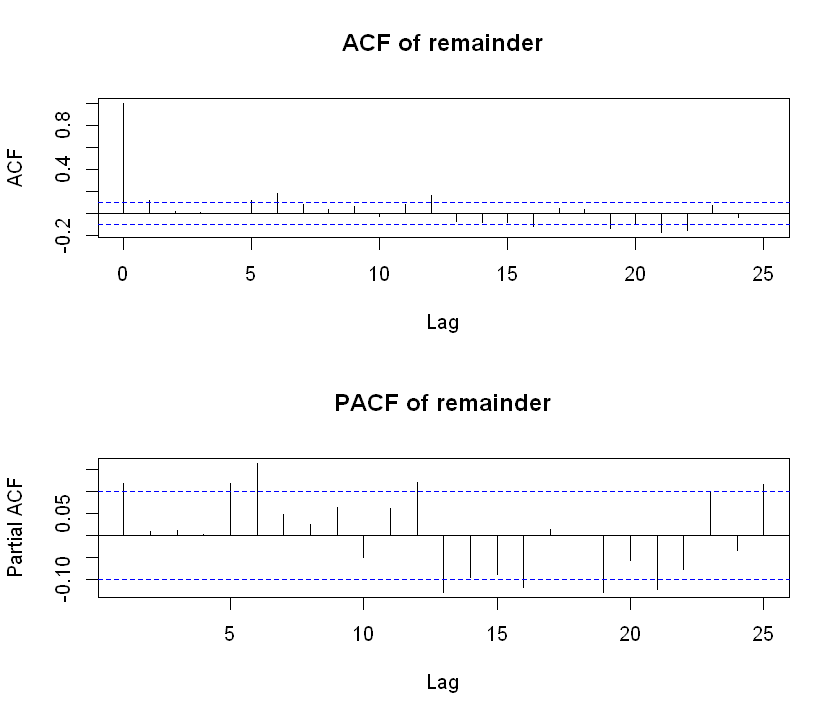

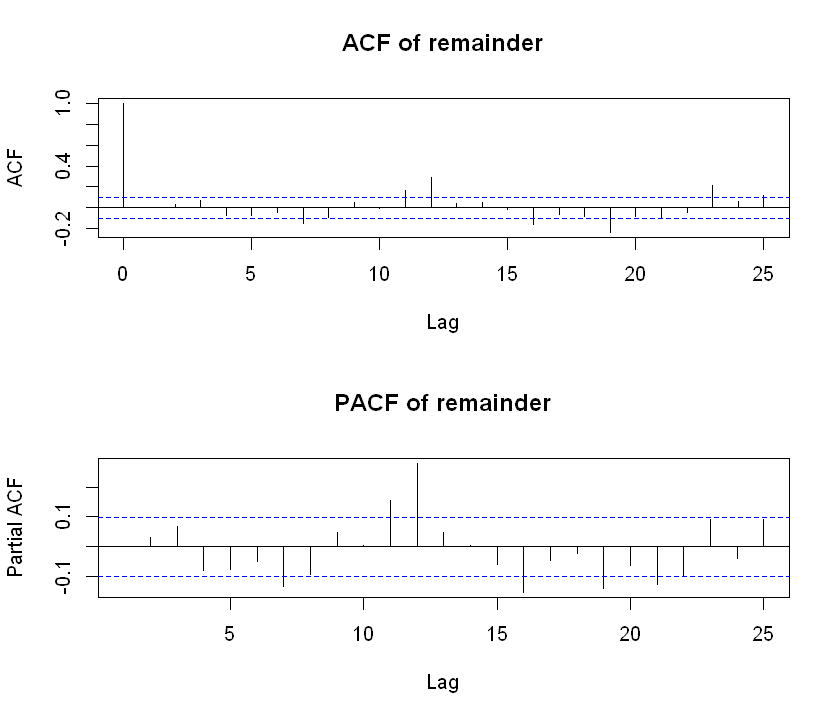

In [31]:
beer.arima = ts.model(elect.decomp[, 3], col = 'ARIMA model for electricity', order = c(2,1,1))
beer.arima = ts.model(elect.decomp[, 3], col = 'ARIMA model for electricity', order = c(1,1,2))
beer.arima = ts.model(elect.decomp[, 3], col = 'ARIMA model for electricity', order = c(3,1,0))
beer.arima = ts.model(elect.decomp[, 3], col = 'ARIMA model for electricity', order = c(2,0,2))
plot.acf(beer.arima$resid[-1], is.df = FALSE)
beer.arima = ts.model(elect.decomp[, 3], col = 'ARIMA model for electricity', order = c(2,0,1))
plot.acf(beer.arima$resid[-1], is.df = FALSE)

## Forecasting Time Series

The R `forecast` package provides some powerful extensions to the standard time series anaytics. In particular, as the name implies, the forecast package is has tools for automatically estimating optimal **seasonal ARIMA** models and using these models to make future forecasts.

The `auto.arima` functon from the `forecast` package does the following:

- Performs a foreward stepwise regression starting from maximum order of each coeficient to find the optimal seasonal ARIMA model. The opimization is performed usingthe Akaike Information Criteria and the Baysian Informatiion Criteria, or BIC.
- The seasonal ARIMA model can be writen as ARIM(p,d,q)(P,D,Q). We have already explored the standard ARIMA model, ARIMA(p,d,q). The additional seasonal terms model seasonal and trend behavior: 
  - P is the order of the seasonal autoregressive model.
  - D is the order of a differening or integrating operator, which models the trend.
  - Q is the order of the seasonal moving average model.
  
The **Baysian Information Criteria** or **BIC** is closely related to the Aaike Information Criteria. The BIC was proposed by Gideon Schwarz in 1978, and is sometimes referred to as the Schwarz Information Criteria. The BIC weights the number of parameters in the model by the log of the number of observations. We can write the BIC as:

$$BIC = ln(n)\ k- 2\ ln(\hat{L})\\
where\\
\hat{L} = the\ likelihood\ given\ the\ fitted\ model\ parmaters\ \hat\theta = p(x| \hat\theta)\\
x = observed\ data\\
k = number\ of\ model\ parameters\\
n = number\ of\ observations$$
  
The `auto.arima` model has a large number of argumets with the purpose of bouding the range of search of p, d, q, P, D, and Q. Execute the example code in the cell below and examine the results. 

In [32]:
require(forecast)
fit.elect = auto.arima(aus.ts[, 'lnelec.ts'], max.p=3, max.q=3,
                       max.P=2, max.Q=2, max.order=5, max.d=2, max.D=1,
                       start.p=0, start.q=0, start.P=0, start.Q=0)
summary(fit.elect)

Loading required package: forecast
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'forecast'"

ERROR: Error in auto.arima(aus.ts[, "lnelec.ts"], max.p = 3, max.q = 3, max.P = 2, : could not find function "auto.arima"


Examine these results and notice the following points:

- The estimated model is ARIMA(0,1,1)(2,1,1).
- The standard errors of the model coeficients are generally an order of magnitude less than the values of the model coeficients. The exception being the `sar2` coeficient, which may not be that significant. 
- A number of error metrics are produced including:
  - Mean error, ME.
  - Root mean square error, or L2 error, RMSE.
  - Mean absolute error, or L1 error, MAE.
  - Mean prediction error, MPE, mean absolute prediction error, MAPE and mean absolute squarer error, or MASE. Prediction error is computed by itteratively updating the model in an expanding window and measuring the error of predicting the next value beyone the window.
  - ACF1 is the correlation of the model residual at the first non-zero lag, or lag 1. 
  
Next we can use the estimated optimal model to make predictions into the future. The code in the cell below computes, summarizes and plots a predicaiton or foecast for the next 12 months of electricity production in Australia. Run this code and examine the results. 

In [ ]:
## Make the forecast for the next year
elect.forecast = forecast(fit.elect, h=12)
summary(elect.forecast)
plot(elect.forecast)

The forecast looks reasonable and the 80% and 95% confidence Intervalues are relatively narrow. 

## Models for Non-Stationary Variance.

The **Autoregressive conditional heteroskedasticity** or **ARCH** and **Generalized Autoregressive conditional heteroskedasticity** or **GARCH** model, and their many relatives, are specifically indended to deal with variance which changes with time. Robert Engle published the ARCH model in 1982 for which he was awarded the Nobel Prize in Economics in 2003. 

These mdoels are beyond the scope of this lesson. Additional information can be found in the references given earlier. Software packages for these models are widely available, including in R and Python.  

####  Copyright 2017, Stephen F Elston. All right reserved. 